<center>
    <img src="https://fpt.edu.vn/Resources/brand/uploads/749540_132829686029858301_o.jpg" width="500" alt='AI1804'/>
    <h1><a id = "start">Assignment: REST API for weather forecast</a></h1>
</center>



<br>

#### Class name:AI1804

#### Student code:HE180848

#### Student name: Dương Hoàng Lâm

<br>

## Introduction

To complete the assignment students will need to use the OpenWeatherMap API to get weather forecast information from OpenWeatherMap and answer the corresponding questions.

**To complete this lab you should done the following task:**

1.  Import packages library need for other tasks
2.  Carefully read about open weather map API
3.  Create open weather map account to get API key
4.  Using open weather map API to get forecast data
5.  Extract forecast data to answer the questions

Estimate time: **120** minutes



<h4 style='color:red; font-weight:bold'>DO NOT CHEAT! 1 point for anybody copy or share code</h4>

### Import packages library

In [2]:
# The library are pre-installed in anaconda enviroment. If error happen when running please uncomment lines below to install them:
!pip install requests
!pip install json
!pip install json2json
# https://openweathermap.org/api

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [3]:
# import required modules
import requests, json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

### 1. OpenWeatherMap API
**OpenWeatherMap** is an online service, owned by `OpenWeather Ltd`, that provides global weather data via API, including current weather data, forecasts, nowcasts and historical weather data for any geographical location. The company provides a minute-by-minute hyperlocal precipitation forecast for any location. The convolutional machine learning model is used to utilise meteorological broadcast services and data from airport weather stations, on-ground radar stations, weather satellites, remote sensing satellites, METAR and automated weather stations.

The company has more than 2 million customers, ranging from independent developers to Fortune 500 companies.

The variety of weather APIs provided by OpenWeatherMap have found a significant popularity among the software developers, which resulted in the growing multitude of repositories on GitHub. The APIs support multiple languages, units of measurement and industry standard data formats like JSON and XML.


### About the API:
OpenWeatherMap provides a range of weather-related products in a variable combination of depth and steps of measurement to millions of clients globally. The product range includes current, historical and forecasted weather data with the granularity as high as 1 minute. The length of the nowcast reaches 2 hours, short-term forecast reaches 16 days and long-term forecast can reach up to 1 year length. Historical weather data goes over 40 years deep. OpenWeather also provides a range of weather maps and weather alert services. Visit following link for more information about open weather map API

https://openweathermap.org/api

### 2. Getting API Key

OpenWeather platform provide a set of elegant and widely recognisable APIs. Powered by convolutional machine learning solutions, it is capable of delivering all the weather information necessary for decision-making for any location on the globe. To start using the APIs, please **<a href='https://home.openweathermap.org/users/sign_up'>sign up here</a>**.

After sign up, visit the following link to get the API Key:
https://home.openweathermap.org/api_keys

In [4]:
# Enter your API key here
api_key = "d10a07f49f5eee0629769af885e7658d"

### <a id = "pandas_read">3. Current weather condition example</a>

Replace your API key and run the examplpe code below. You should see the current weather data in Hanoi, VietNam

In [5]:
# base_url variable to store url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
 
# Give city name
city_name = "Hanoi"
 
# complete_url variable to store full url address
complete_url = base_url + "appid=" + api_key + "&q=" + city_name
print('Request URL:', complete_url)

# get() method of requests module return response object
response = requests.get(complete_url)

# json method of response object convert json format data into dictionary format data
data = response.json()

# get the main data
main = data['main']

# print(data)
print("Temperature (in Cencius unit) = " +
                    str(round(main["temp"] - 273,2)) +
          "\natmospheric pressure (in hPa unit) = " +
                    str(main["pressure"]) +
          "\nhumidity (in percentage) = " +
                    str(main["humidity"]) +
          "\ndescription = " +
                    str(data["weather"]))

Request URL: http://api.openweathermap.org/data/2.5/weather?appid=d10a07f49f5eee0629769af885e7658d&q=Hanoi
Temperature (in Cencius unit) = 34.15
atmospheric pressure (in hPa unit) = 1005
humidity (in percentage) = 56
description = [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}]


### 4. Construct the URL

To get the proper API call URL format, please review the list of APIs provided by OpenWeatherMap. Each API will provide a suitable URL to get the corresponding data. 

For example: The following API URL can be use to get current weather condition.
```python
url = base_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&q=" + city_name
```

Carefull reading API document: https://openweathermap.org/api to find appropriate API for the taskes

# Problem
### Task 1. Request weather forecast the data
Write python code use `request` library to get forecast data about **5 day / 3 hour at Hanoi, VietNam** from OpenWeatherMap. After this task, you should display a data frame look like the following table:

<img src='https://drive.google.com/uc?export=view&id=1jWhnfrBYjn8cabV3IDKGt8LtS0TPpNcL'/>

In [6]:
# Enter code here
import requests
import pandas as pd
import matplotlib.pyplot as plt
url="https://api.openweathermap.org/data/2.5/forecast?q=Hanoi&appid=d10a07f49f5eee0629769af885e7658d"
response=requests.get(url)
data= response.json()
weather_data = []
for item in data["list"]:
    weather_data.append({
        "time": item["dt_txt"],
        "temp": item["main"]["temp"],
        "feels_like": item["main"]["feels_like"],
        "temp_min": item["main"]["temp_min"],
        "temp_max": item["main"]["temp_max"],
        "pressure": item["main"]["pressure"],
        "sea_level": item["main"]["sea_level"],
        "grnd_level": item["main"]["grnd_level"],
        "humidity": item["main"]["humidity"],
        "temp_kf": item["main"]["temp_kf"],
        "id": item["weather"][0]["id"],
        "main": item["weather"][0]["main"],
        "description": item["weather"][0]["description"],
        "icon": item["weather"][0]["icon"],
        "speed": item["wind"]["speed"],
        "deg": item["wind"]["deg"],
        "gust": item["wind"]["gust"]
        })
df = pd.DataFrame(weather_data)
df

,time,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf,id,main,description,icon,speed,deg,gust
0,2024-07-08 06:00:00,307.73,314.73,307.73,308.90,1004,1004,1001,56,-1.17,802,Clouds,scattered clouds,03d,4.42,170,4.69
1,2024-07-08 09:00:00,307.92,314.87,307.92,308.30,1002,1002,999,54,-0.38,803,Clouds,broken clouds,04d,5.12,150,5.53
2,2024-07-08 12:00:00,303.37,308.99,303.37,303.37,1002,1002,1001,71,0.00,803,Clouds,broken clouds,04n,5.52,138,9.23
3,2024-07-08 15:00:00,301.61,306.80,301.61,301.61,1005,1005,1004,82,0.00,500,Rain,light rain,10n,4.52,143,9.31
4,2024-07-08 18:00:00,301.06,305.64,301.06,301.06,1004,1004,1003,84,0.00,500,Rain,light rain,10n,3.47,140,8.90
5,2024-07-08 21:00:00,300.35,304.23,300.35,300.35,1004,1004,1002,88,0.00,804,Clouds,overcast clouds,04n,2.32,117,5.42
6,2024-07-09 00:00:00,301.39,306.55,301.39,301.39,1005,1005,1004,84,0.00,501,Rain,moderate rain,10d,2.91,103,5.23
7,2024-07-09 03:00:00,306.53,313.53,306.53,306.53,1005,1005,1003,61,0.00,500,Rain,light rain,10d,2.56,142,3.37
8,2024-07-09 06:00:00,309.00,315.91,309.00,309.00,1003,1003,1001,50,0.00,500,Rain,light rain,10d,2.03,139,3.40
9,2024-07-09 09:00:00,308.11,315.11,308.11,308.11,1001,1001,999,55,0.00,500,Rain,light rain,10d,4.26,115,4.73


### Task 2. Plot a line chart to represent wind condition over all the data in dataset 

- The chart should show each line for wind speed and gust level
- Each legend should has annotate
- Set ylabel is `value`.
- Set xlabel should be rotation 90°.

Find the minimum, maximum gust level and time of occurrence.

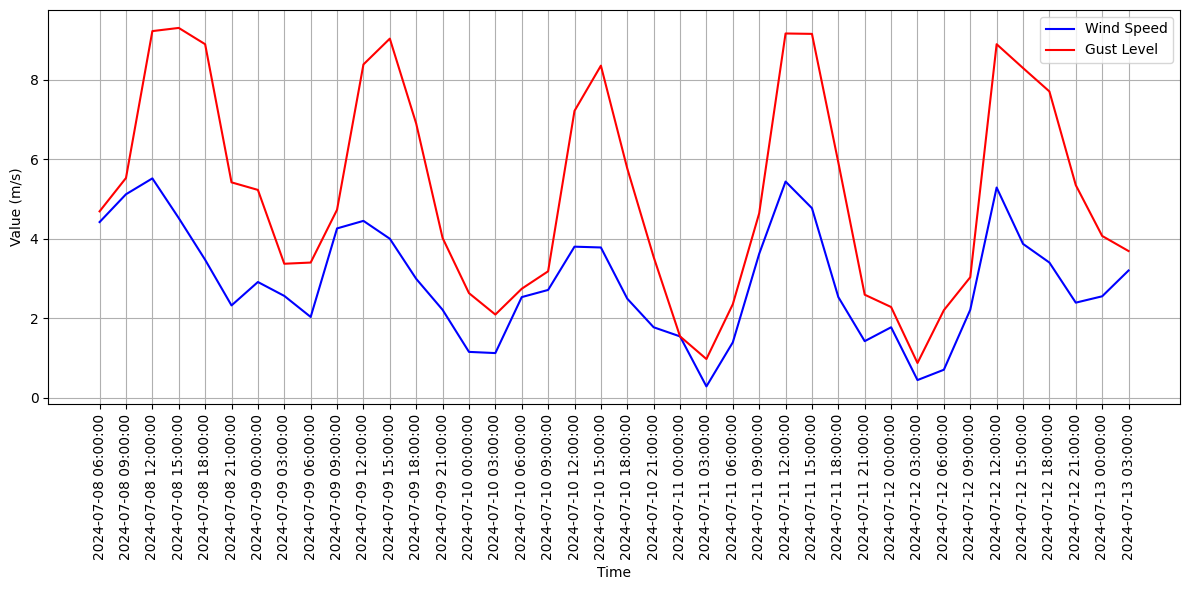

Maximum gust level: 9.31 at 2024-07-08 15:00:00
Minimum gust level: 0.87 at 2024-07-12 03:00:00


In [7]:
# Enter code here
import requests
import pandas as pd
import matplotlib.pyplot as plt

url="https://api.openweathermap.org/data/2.5/forecast?q=Hanoi&appid=d10a07f49f5eee0629769af885e7658d"
response = requests.get(url)
data = response.json()
wind_data=[]
for item in data["list"]:
    wind_data.append({
        "time": item["dt_txt"],
        "speed": item["wind"]["speed"],
        "deg": item["wind"]["deg"],
        "gust": item["wind"]["gust"]})
df=pd.DataFrame(wind_data)

plt.figure(figsize=(12, 6))
plt.plot(df["time"], df["speed"], label="Wind Speed", color="blue")
plt.plot(df["time"], df["gust"], label="Gust Level", color="red")
plt.ylabel("Value (m/s)")
plt.xlabel("Time")
plt.xticks(rotation=90)
plt.legend()
min_gust= df["gust"].min()
max_gust= df["gust"].max()

min_gust_time = df["time"][df["gust"] == min_gust].values[0]
max_gust_time = df["time"][df["gust"] == max_gust].values[0]
plt.tight_layout()
plt.grid(True)
plt.show()
print("Maximum gust level:",max_gust, "at",max_gust_time)
print("Minimum gust level:",min_gust, "at",min_gust_time)





### Task 3. Use a pie chart to show percentages of weather conditions (`description` column)

- The chart should has title: `percentages of weather conditions`
- Percentage of each conditions should be showed clearly


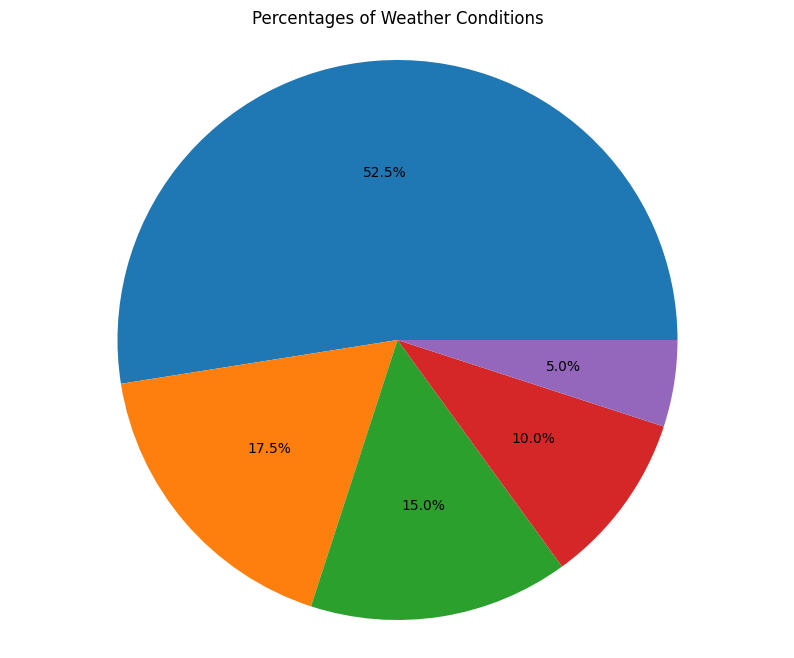

In [8]:
# Enter code here
import pandas as pd
import matplotlib.pyplot as plt
url="https://api.openweathermap.org/data/2.5/forecast?q=Hanoi&appid=d10a07f49f5eee0629769af885e7658d"
response = requests.get(url)
data = response.json()
weather_conditions=[]
for item in data["list"]:
    weather_conditions.append({
        "description": item["weather"][0]["description"],
    })   
df = pd.DataFrame(weather_conditions)
weather_counts = df["description"].value_counts().reset_index(name="count")
weather_counts["percentage"] = weather_counts["count"] / len(df) * 100
plt.figure(figsize=(10, 8))
plt.pie(weather_counts["percentage"], autopct="%1.1f%%")
plt.title("Percentages of Weather Conditions")
plt.axis("equal")
plt.show()


### Task 4. Use box plots to visualize humidity data for the following 4 days.

In [9]:
# Enter code here
import pandas as pd
import matplotlib.pyplot as plt
url="https://api.openweathermap.org/data/2.5/forecast?q=Hanoi&appid=d10a07f49f5eee0629769af885e7658d"
response = requests.get(url)
data = response.json()
humidity=[]
for item in data["list"]:
    humidity.append({
        "time": item["dt_txt"],
         "humidity": item["main"]["humidity"],
})
df=pd.DataFrame(humidity)
df

,time,humidity
0,2024-07-08 06:00:00,56
1,2024-07-08 09:00:00,54
2,2024-07-08 12:00:00,71
3,2024-07-08 15:00:00,82
4,2024-07-08 18:00:00,84
5,2024-07-08 21:00:00,88
6,2024-07-09 00:00:00,84
7,2024-07-09 03:00:00,61
8,2024-07-09 06:00:00,50
9,2024-07-09 09:00:00,55


### Task 5. Scatter chat

use scatter chat to show the correlation between feels-like and air humidity.

Please write a comment about this correlation.

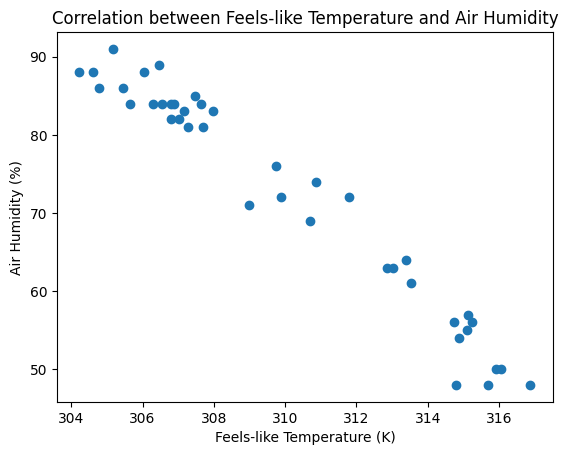

In [12]:
# Enter code here
df = pd.DataFrame(weather_data)
plt.scatter(df['feels_like'], df['humidity'])
plt.xlabel('Feels-like Temperature (K)')
plt.ylabel('Air Humidity (%)')
plt.title('Correlation between Feels-like Temperature and Air Humidity')
plt.show()

## Author

#### <a href="" target="_blank">Do Thai Giang</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description              |   
| ----------------- | ------- | ---------- | ----------------------------------
| 2022-09-28        | 1.0     | Giangdt26  | Create the 1st version          | 
| 2023-07-18        | 1.1     | Giangdt26  | Add cheat warning!              |
| 2023-07-18        | 1.2     | Giangdt26  | Remove min, max in task 2       |
| 2023-07-18        | 1.3     | Giangdt26  | Add humidity, pressure in task 2|
| 2023-11-07        | 1.4     | Giangdt26  | Change figsize of sample        |                                           

<hr>

## <h3 align="center"> © FPT University. All rights reserved. <h3/>
